In [10]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plots
sns.set(style="whitegrid")
%matplotlib inline


In [3]:
df = pd.read_csv('../data/rawData.csv')
# 👀 Show first few rows
df.head()


C:\Users\Bob\AppData\Local\Temp\ipykernel_20956\270111254.py:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/rawData.csv')


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [11]:
# General Info
df.info()

# Summary stats for numerical columns
df.describe()

# Check missing values
df.isna().sum().sort_values(ascending=False)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 49 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      1000098 non-null  object 
 9   AccountType               1000098 non-null  object 
 10  MaritalStatus             1000098 non-null  object 
 11  Gender                    1000098 non-null  object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

Rebuilt                     641901
Converted                   641901
WrittenOff                  641901
make                           552
cubiccapacity                  552
kilowatts                      552
Model                          552
VehicleType                    552
NumberOfDoors                  552
mmcode                         552
bodytype                       552
VehicleIntroDate               552
Cylinders                      552
PolicyID                         0
TransactionMonth                 0
IsVATRegistered                  0
UnderwrittenCoverID              0
SubCrestaZone                    0
MainCrestaZone                   0
PostalCode                       0
Province                         0
Country                          0
Gender                           0
MaritalStatus                    0
AccountType                      0
Bank                             0
Language                         0
Title                            0
LegalType           

In [12]:
# Convert to numeric, remove commas
df['CapitalOutstanding'] = df['CapitalOutstanding'].astype(str).str.replace(",", "", regex=False)
df['CapitalOutstanding'] = pd.to_numeric(df['CapitalOutstanding'], errors='coerce')



In [13]:
# 🔍 Check for missing values in each column
missing_values = df.isnull().sum()


# 📋 Filter to show only columns with missing values
missing_values[missing_values > 0].sort_values(ascending=False)


Rebuilt             641901
Converted           641901
WrittenOff          641901
VehicleType            552
mmcode                 552
Cylinders              552
Model                  552
make                   552
cubiccapacity          552
NumberOfDoors          552
bodytype               552
kilowatts              552
VehicleIntroDate       552
dtype: int64

In [14]:
# Drop columns with more than 70% missing values
high_missing = df.columns[df.isnull().mean() > 0.7]
df.drop(columns=high_missing, inplace=True)

print("Dropped columns due to excessive missing values:", list(high_missing))


Dropped columns due to excessive missing values: []


In [15]:
# Fill high missing binary columns with 'Unknown'
high_missing_cols = ['Rebuilt', 'Converted', 'WrittenOff']
for col in high_missing_cols:
    df[col] = df[col].fillna('Unknown')



In [16]:
#moderate values 522 impute with mode
vehicle_cat_cols = ['VehicleType', 'mmcode', 'make', 'Model', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate']
for col in vehicle_cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [17]:
vehicle_num_cols = ['Cylinders', 'cubiccapacity', 'kilowatts']
for col in vehicle_num_cols:
    df[col] = df[col].fillna(df[col].median())


In [18]:
# Add missing flags for modeling purposes
for col in high_missing_cols + vehicle_cat_cols + vehicle_num_cols:
    df[f"{col}_was_missing"] = df[col].isna().astype(int)


In [ ]:
# # Categorical columns to fill with mode
# cat_cols = ['NewVehicle', 'Bank', 'AccountType', 'Gender', 'MaritalStatus']
# for col in cat_cols:
#     df[col].fillna(df[col].mode()[0], inplace=True)

# # Numeric columns to fill with median
# num_cols = ['CapitalOutstanding']
# for col in num_cols:
#     df[col].fillna(df[col].median(), inplace=True)

# # Drop columns with too many missing values (e.g., CustomValueEstimate, if needed)
# missing_ratio = df.isna().mean()
# cols_to_drop = missing_ratio[missing_ratio > 0.5].index.tolist()
# df.drop(columns=cols_to_drop, inplace=True)

# # Final check
# df.isna().sum().sort_values(ascending=False)


In [19]:
# Create a new column: Loss Ratio
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']


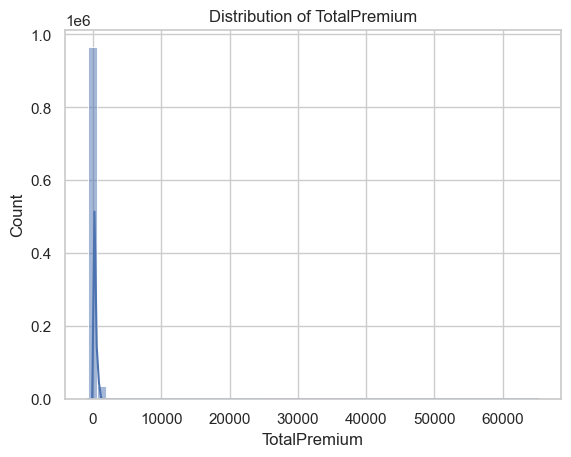

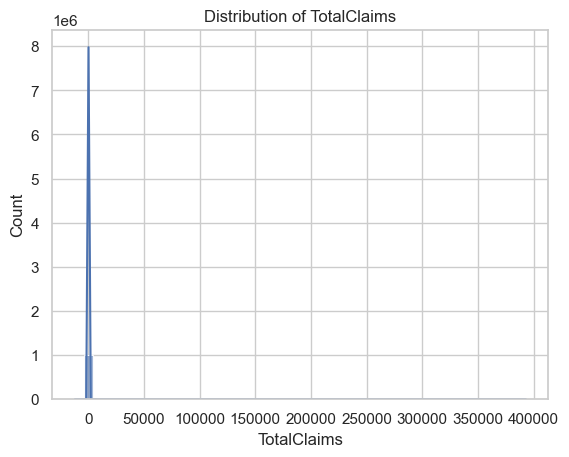

In [20]:
# Total Premium
sns.histplot(df['TotalPremium'], bins=50, kde=True)
plt.title('Distribution of TotalPremium')
plt.show()

# Total Claims
sns.histplot(df['TotalClaims'], bins=50, kde=True)
plt.title('Distribution of TotalClaims')
plt.show()


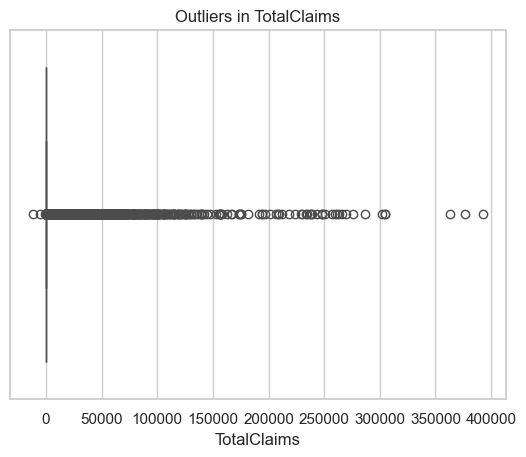

In [21]:
# Boxplot for TotalClaims
sns.boxplot(x=df['TotalClaims'])
plt.title('Outliers in TotalClaims')
plt.show()


c:\Users\Bob\Desktop\10Acadamy\week-3\AlphaCare-insurance\alphacare\Lib\site-packages\matplotlib\transforms.py:2436: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),
c:\Users\Bob\Desktop\10Acadamy\week-3\AlphaCare-insurance\alphacare\Lib\site-packages\matplotlib\transforms.py:2436: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),


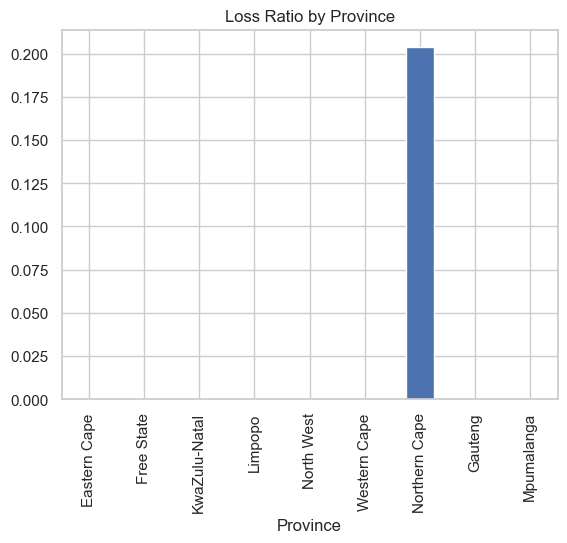

c:\Users\Bob\Desktop\10Acadamy\week-3\AlphaCare-insurance\alphacare\Lib\site-packages\matplotlib\transforms.py:2436: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),
c:\Users\Bob\Desktop\10Acadamy\week-3\AlphaCare-insurance\alphacare\Lib\site-packages\matplotlib\transforms.py:2436: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),


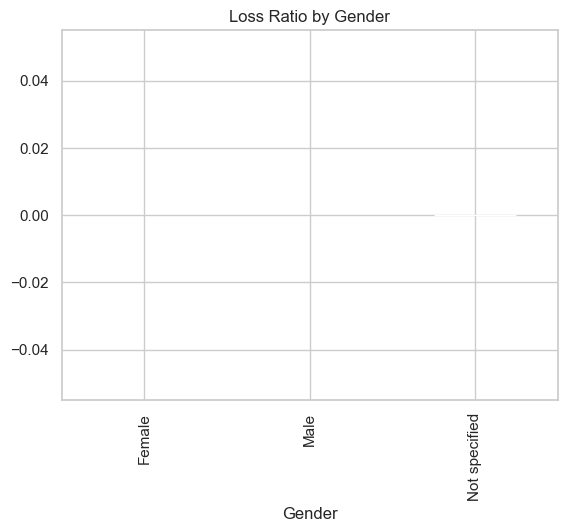

c:\Users\Bob\Desktop\10Acadamy\week-3\AlphaCare-insurance\alphacare\Lib\site-packages\matplotlib\transforms.py:2436: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),
c:\Users\Bob\Desktop\10Acadamy\week-3\AlphaCare-insurance\alphacare\Lib\site-packages\matplotlib\transforms.py:2436: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),


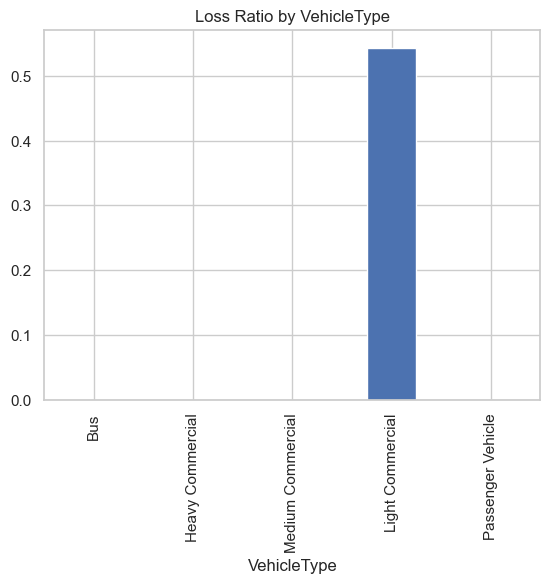

In [22]:
# Province
df.groupby('Province')['LossRatio'].mean().sort_values(ascending=False).plot(kind='bar', title='Loss Ratio by Province')
plt.show()

# Gender
df.groupby('Gender')['LossRatio'].mean().plot(kind='bar', title='Loss Ratio by Gender')
plt.show()

# Vehicle Type
df.groupby('VehicleType')['LossRatio'].mean().sort_values(ascending=False).plot(kind='bar', title='Loss Ratio by VehicleType')
plt.show()


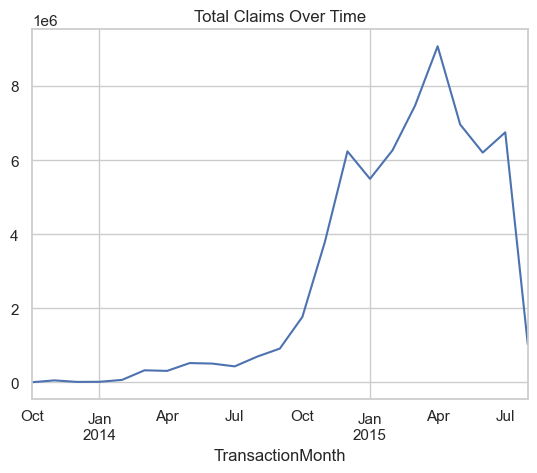

In [23]:
# Convert TransactionMonth to datetime
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])

# Monthly total claims
df.groupby(df['TransactionMonth'].dt.to_period("M"))['TotalClaims'].sum().plot(kind='line', title='Total Claims Over Time')
plt.show()


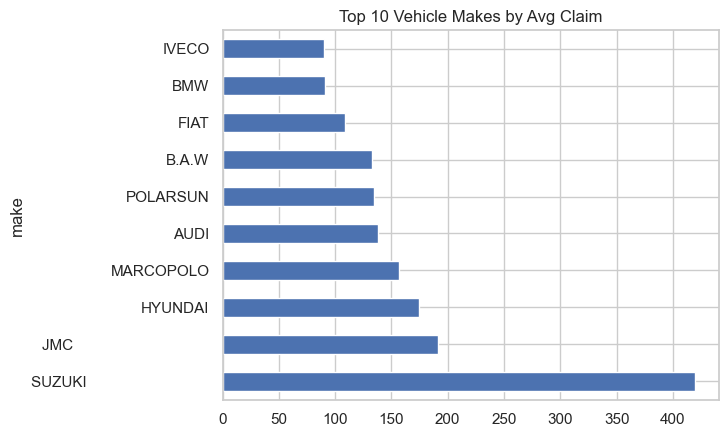

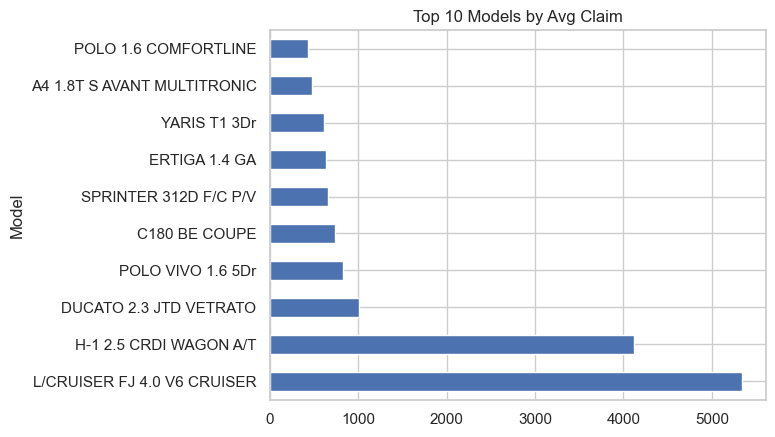

In [24]:
# Average claim by make
top_makes = df.groupby('make')['TotalClaims'].mean().sort_values(ascending=False).head(10)
top_makes.plot(kind='barh', title='Top 10 Vehicle Makes by Avg Claim')
plt.show()

# Same for models
top_models = df.groupby('Model')['TotalClaims'].mean().sort_values(ascending=False).head(10)
top_models.plot(kind='barh', title='Top 10 Models by Avg Claim')
plt.show()


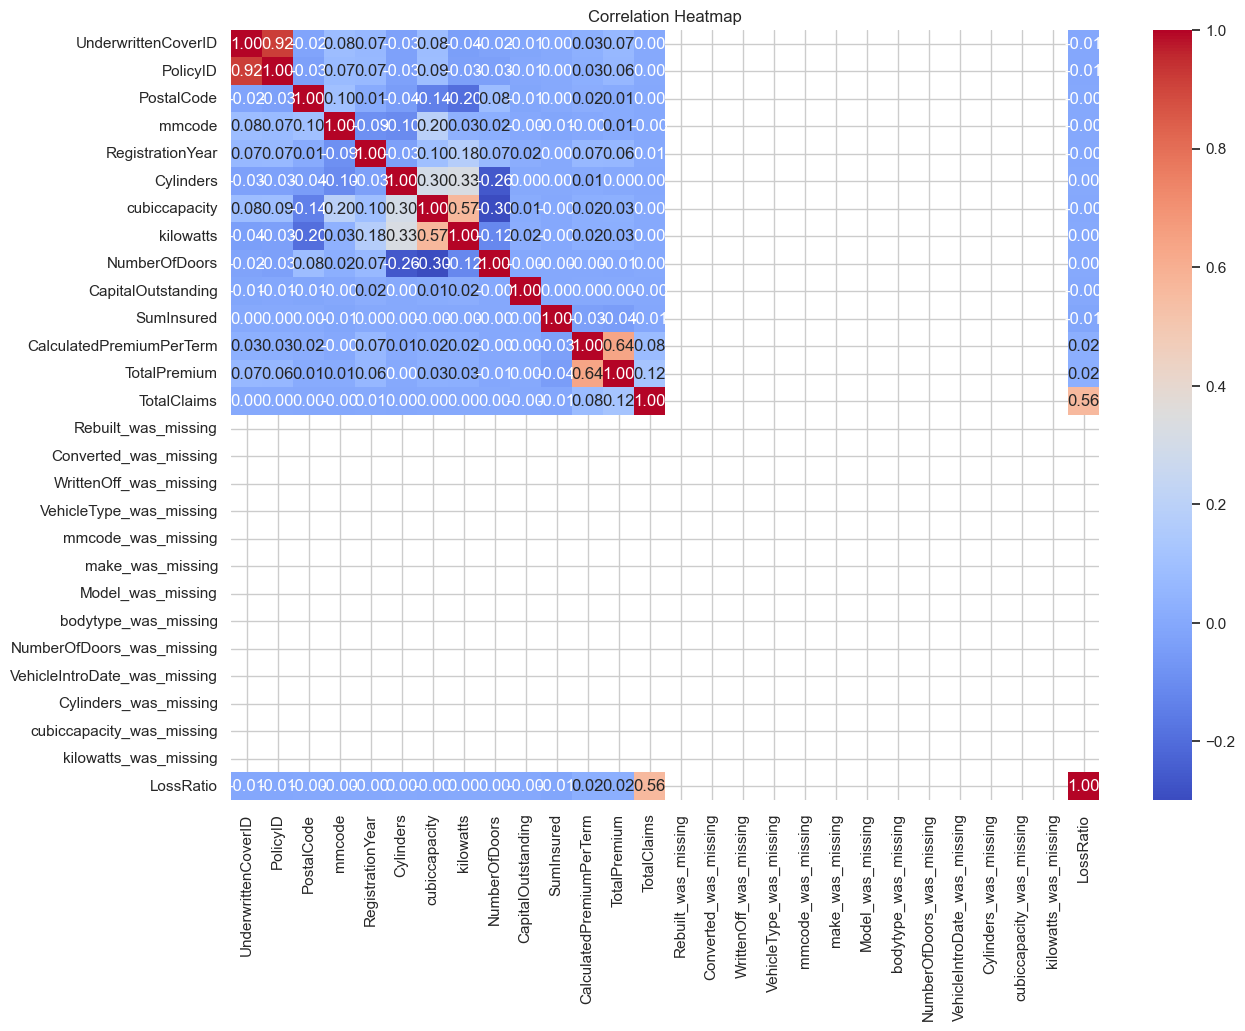

In [25]:
# Correlation matrix
corr = df.select_dtypes(include=np.number).corr()

# Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [26]:
# Save to CSV
df.to_csv("../data/cleaned_insurance_data.csv", index=False)
